In [1]:
%cd /content/drive/MyDrive/Colab Notebooks/New Hobby/데이터 과학을 위한 통계/practicalstatisticsfordatascientists/python

/content/drive/MyDrive/Colab Notebooks/New Hobby/데이터 과학을 위한 통계/practicalstatisticsfordatascientists/python


In [2]:
!pip install wquantiles

In [3]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [4]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [5]:
AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'

#1.1 정형화된 데이터 요소



##용어정리
- 수치형 : 숫자를 이용해 표현할 수 있는 데이터
- 연속형 : 일정 범위 안에서 어떤 값이든 취할 수 있는 데이터
- 이산 : 정수값만 취할 수 있는 데이터
- 범주형 : 가능한 범주 안의 값만 취할 수 있는 데이터
- 이진 : 두개의 값만을 갖는 범주형 데이터의 특수한 경우
- 순서형 : 값들 사이에 분명한 순위가 있는 범주형 데이터

##주요개념
- 일반적으로 소프트웨어에서는 데이터를 종류별로 구분한다.
- 데이터 유형에는 수치형(연속, 이산)과 범주형(이진, 순서)가 있다.
- 소프트웨어에서 데이터 종류를 정하는 것은 해당 데이터를 어떻게 처리할지를 정하는 것과 같다.

#1.2 테이블 데이터


##주요개념
- 데이터 과학에서 기본이 되는 데이터 구조는 행과 열이 각각 레코드와 변수를 의미하는 테이블 모양의 행렬이다.
- 용어가 혼란스러울 수 있으니 주의하자. 데이터 과학에 관련된 서로 다른 학문들은 저마다 다양한 용어를 사용한다.

#1.3 위치 수정


##용어정리
- 평균(mean) :  모든 값의 총합을 개수로 나눈 값
- 가중 평균(weighted mean): 가중치를 곱한 값의 총합을 가중치의 총합으로 나눈 값
- 중간값(median) : 데이터에서 가장 가운데 위치한 값
- 백분위수 : 전체 데이터의 P%를 아래에 두는 값
- 가중 중간값(weighted median) : 데이터를 정렬한 후, 각 가중치 값을 위에서부터 더할 때, 총합의 중간이 위치하는 데이터 값
- 절사평균(trimmed mean) : 정해진 개수의 극단값을 제외한 나머지 값들의 평균
- 로버스트 : 극단값들에 민감하지 않다
- 특잇값 : 대부분의 값과 매우 다른 데이터값

In [6]:
# 1.3.3 예제: 인구에 따른 살인 비율의 위치 추정
# Table 1-2
state = pd.read_csv(STATE_CSV)
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


In [7]:
# 평균
state['Population'].mean()

6162876.3

In [8]:
# 절사 평균
trim_mean(state['Population'], 0.1)

4783697.125

In [9]:
# 중간값
state['Population'].median()

4436369.5

In [10]:
# 가중 평균
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [11]:
# 가중 중간값
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

#1.4 변이 추정

##용어정리
- 편차 : 관측값과 위치 추정값 사이의 차이
- 분산 : 평균과의 편차를 제곱한 값들의 합을 n-1로 나눈 값
- 표준편차 : 분산의 제곱근
- 평균절대편차 : 평균과의 편차의 절댓값의 평균
- 중간값의 줄위절대편차(MAD, median absolute from the median) : 중간값과의 편차의 절댓값의 중간값
- 범위 : 데이터의 최댓값과 최솟값의 차이
- 순서통계량 : 최소에서 최대까지의 정렬된 데이터 값에 따른 계량형
- 백분위수 : 어떤 값들의 P%가 이 값 혹은 더 작은 값을 갖고, (100-P)%가 이 값 혹은 더 큰 값을 갖도록 하는 값
- 사분위범위 : 75번째 백분위수와 25번째 백순위수 사이의 차이

** 분산, 표준편차, 평균절대편차 모두 특잇값과 극단값에 로버스트하지 않다.


##주요개념
- 분산과 표준편차는 가장 보편적으로 널리 사용되는 변이 측정 방법이다.
- 이들 모두 특잇값에 민감하다.
- 중간값과 백분위수로부터 평균절대편차와 중간값의 중위절대편차를 구하는 것이 좀 더 로버스트하다.

## 참고
자유도 = 변인의 수 - 제약의 수 또는,
자유도 = 내가 가지고 있는 정보의 개수 - 추정해야할 미지수의 개수

https://blog.naver.com/physicopianist/221079231724

In [12]:
# 1.4.3 예제: 주별 인구의 변이 추정
# 표준편차
state['Population'].std()

6848235.347401142

In [13]:
# 사분위범위
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

In [14]:
# MAD
robust.scale.mad(state['Population'])

3849876.1459979336

#1.5 데이터 분포 탐색하기

##용어정리
- 상자그림 : 데이터 분포의 시각화하기 위한 간단한 방법
- 도수분포표 : 어떤 구간에 해당하는 수치 데이터 값들의 빈도를 나타내는 기록
- 히스토그램 : x축은 구간들을, y축은 빈도수를 나타내는 도수 테이블의 그림. 시각적으로 비슷하지만, 막대 그래프를 히스토그램과 혼동해서는 안된다.
- 밀도 그림 : 히스토그램을 부드러운 곡선으로 나타낸 그림. 커널밀도추청을 주로 사용한다.

In [15]:
# 백분위수 구하는 법 : 판다스의 quantile을 사용한다.
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

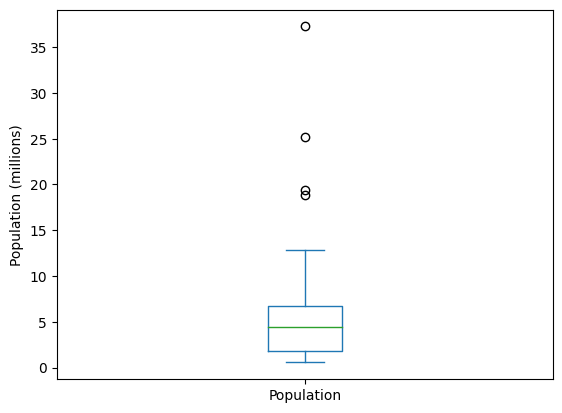

In [17]:
# boxplot
ax = (state['Population']/1e6).plot.box()
ax.set_ylabel('Population (millions)')

In [21]:
# 도수분포표
binnedPopulation = pd.cut(state['Population'], 10) #10개의 동일한 구간으로 나눈다.
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64


Text(0.5, 0, 'Population (millions)')

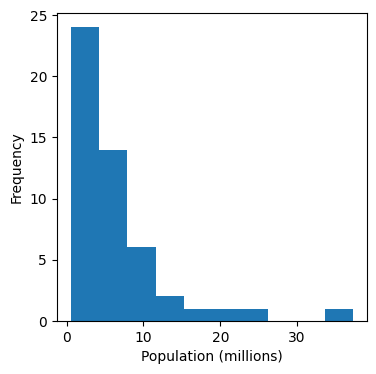

In [23]:
# 히스토그램
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population (millions)')

보통 히스토그램은 다으모가 같은 정보들을 담고 있다.
- 그래프에 빈 구간들이 있을 수 있다.
- 구간은 동일한 크기를 갖는다.
- 구간의 수 또는 크기는 사용자가 결정할 수 있다.
- 빈 구간이 있지 않은 이상, 막대 사이는 공간 없이 서로 붙어 있다.

위치 : 일차 모멘트
변이 : 이차 모멘트
왜도 : 삼차 모멘트
첨도 : 사차 모멘트

Text(0.5, 0, 'Murder Rate (per 100,000)')

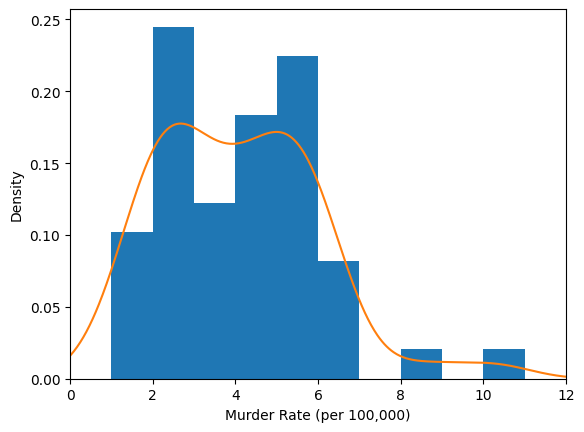

In [24]:
# 커널 밀도 추청
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

##주요개념
- 도수 히스토그램은 y축에 횟수를 x축에 변숫값들을 표시하고 한눈에 데이터의 분포를 볼 수 있다.
- 도수분포표는 히스토그램에 보이는 횟수들을 표 형태로 나타낸 것이다.
- 상자 그림에서 상자의 위와 아래 부분은 각각 75%, 25% 백분위수를 의미하며, 이것 역시 데이터의 분포를 한눈에 파악할 수 있도록 돕는다. 주로 분포들을 서로 비교하기 위해서 사용된다.
- 밀도 그림은 히스토그램의 부드러운 버전이라고 할 수 있다. 데이터로부터 이 그림을 얻기 위해서는 어떤 함수를 구해야 하는데 여러가지 가능한 추정 방법이 있다.

#1.6 이진 데이터와 범주 데이터 탐색하기

##용어정리
- 최빈값(mode) : 데이터에서 가장 자주 등장하는 범주 혹은 값
- 기댓값 : 범주에 해당하는 어떤 수치가 있을 때, 범주의 출현 확률에 따른 평균
- 막대도표 : 각 범주의 빈도수 혹은 비율을 막대로 나타낸 그림
- 파이그림 : 각 범주의 빈도수 혹은 비율을 원의 부채꼴 모양으로 나타낸 그림

In [30]:
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


Text(0, 0.5, 'Count')

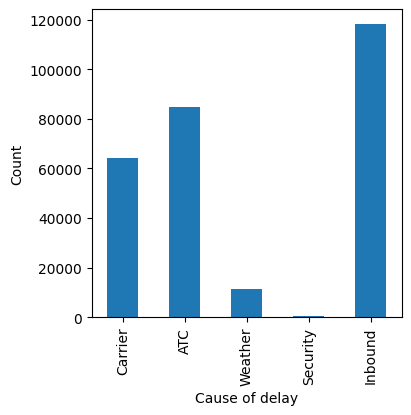

In [29]:
# bar plot
ax = dfw.transpose().plot.bar(figsize=(4,4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

기댓값은 다음과 같이 계산할 수 있다.
1. 각 결과값과 발생 확률을 곱한다.
2. 이 값들을 모두 더한다.

EV = Σ PV (P:probablilty, V:result value)

##주요개념
- 범주형 데이터는 보통 비율로 요약할 수 있고, 막대 도표를 사용해 시각화한다.
- 범주란 전혀 다른 집합, 정도를 나타내는 요인변수의 수준, 구간별로 나뉜 수치 데이터 같은 것들을 의마한다.
- 기댓값은 어떤 값과 그 값이 일어날 확률을 서로 곱해 더한 값을 의미한다. 주로 요인변수의 수준을 요약하는데 사용된다.

#1.7 상관관계

##용어정리
- 상관계수(correlation coefficient) : 수치적으로 변수들 간에 어떤 관계가 있는지를 나타내기 위한 측정량 ([-1, 1])
- 상관행렬(correlation matrix) : 행과 열이 변수들을 의미하는 표, 각 셀은 그 행과 열에 해당하는 변수들 간의 상관관계를 의미
- 산점도 : x축과 y축이 서로 다른 두 개의 변수를 나타내는 도표

피어슨 상관계수는 다음과 같은 방법으로 구한다.

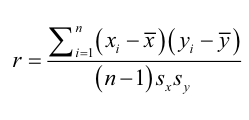


In [44]:
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)

In [45]:
# Table 1-7
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


In [46]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

                 XLI       QQQ       SPY       DIA       GLD    VXX       USO  \
2012-07-02 -0.376098  0.096313  0.028223 -0.242796  0.419998 -10.40  0.000000   
2012-07-03  0.376099  0.481576  0.874936  0.728405  0.490006  -3.52  0.250000   
2012-07-05  0.150440  0.096313 -0.103487  0.149420  0.239991   6.56 -0.070000   
2012-07-06 -0.141040 -0.491201  0.018819 -0.205449 -0.519989  -8.80 -0.180000   
2012-07-09  0.244465 -0.048160 -0.056445 -0.168094  0.429992  -0.48  0.459999   

                 IWM       XLE       XLY       XLU       XLB       XTL  \
2012-07-02  0.534641  0.028186  0.095759  0.098311 -0.093713  0.019076   
2012-07-03  0.926067  0.995942  0.000000 -0.044686  0.337373  0.000000   
2012-07-05 -0.171848 -0.460387  0.306431 -0.151938  0.103086  0.019072   
2012-07-06 -0.229128  0.206706  0.153214  0.080437  0.018744 -0.429213   
2012-07-09 -0.190939 -0.234892 -0.201098 -0.035751 -0.168687  0.000000   

                 XLV       XLP       XLF       XLK  
2012-07-02 -0.0

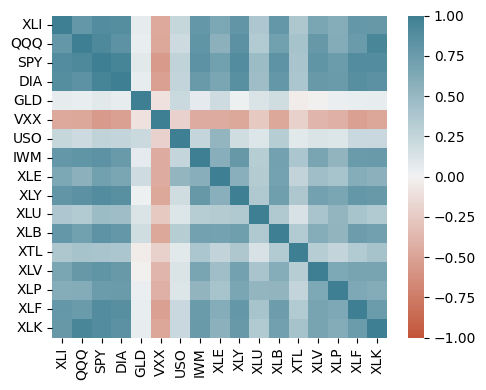

In [47]:
# heatmap
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

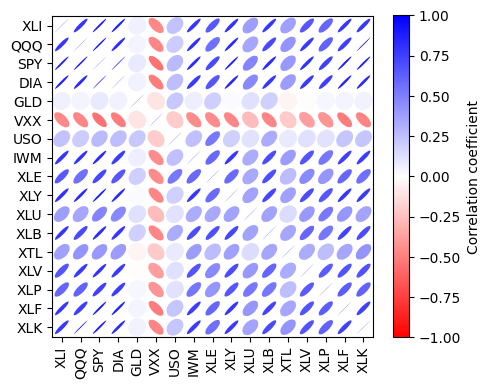

In [48]:
#교재의 히트맵은 다음과 같이 구현되었다.
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec, ax

m, ax = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m, ax=ax)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

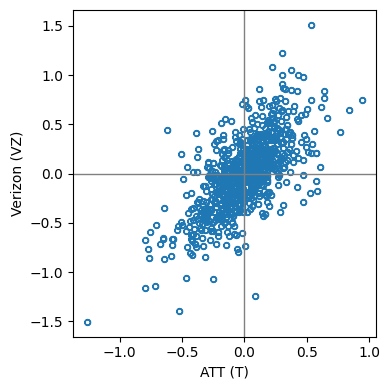

In [49]:
# 산점도
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4,4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)
plt.tight_layout()

##주요개념
- 상관계수는 두 변수 사이에 서로 어떤 관계가 있는지를 측정한다.
- 양의 상관관계, 음의 상관관계
- 상관계수는 표준화된 측정 지표
- 상관계수가 0이다 = 아무런 상관성이 없다. 하지만, 데이터를 랜덤하게 재배치하면 우연히 상관계수가 0이 아닌 값이 될 수도 있다.